In [74]:
import pandas as pd

df = pd.read_csv('creditcard.csv')


df.drop('Time', inplace=True, axis=1)

In [75]:
from sklearn.ensemble import IsolationForest

true = df[df['Class'] == 0].sample(frac=0.01)
fraude = df[df['Class'] == 1].sample(frac=.5)
import numpy as np


df = pd.concat([true, fraude])

In [76]:
df2 = df.drop('Class', axis=1)
clf = IsolationForest(n_estimators=525, contamination=.08, n_jobs=-1)
clf.fit(df2)
prediction  = clf.predict(df2)

In [77]:
pred = (list(map(lambda x: int(x == -1), prediction)))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
tn, fp, fn, tp = confusion_matrix(np.array(df['Class']), pred).ravel()

accuracy = tp/(tp + fp)
recall = tp/ (tp +fn)
sensibility = tn/(tn + fp)
specificity = (recall)

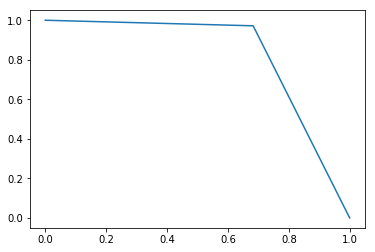

In [78]:
import matplotlib.pyplot as plt

plt.plot([0,specificity,1],[1,sensibility,0])
plt.show()

In [79]:
1-sum(df['Class'])/len(df)

0.92036257688572354

In [80]:
df_all = pd.read_csv('creditcard.csv')
prediction = clf.predict(df_all.drop(['Class', 'Time'], axis=1))

In [81]:
pred = (list(map(lambda x: int(x == -1), prediction)))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
tn, fp, fn, tp = confusion_matrix(np.array(df_all['Class']), pred).ravel()

accuracy = tp/(tp + fp)
recall = tp/ (tp +fn)
sensibility = tn/(tn + fp)
specificity = (recall)

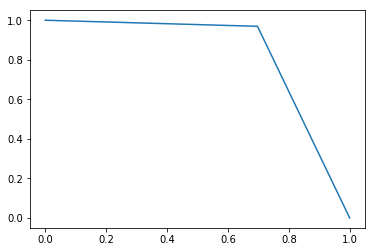

In [82]:
import matplotlib.pyplot as plt

plt.plot([0,specificity,1],[1,sensibility,0])
plt.show()